# Tugas Praktikum
### 1. Tugas K-Means

Buatlah sebuah model K-Means dengan ketentuan,

Gunakan data 'Mall_Customers.csv'

Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.

### 2. Tugas DBSCAN
Buat dataset make_moons (1000 sampel, noise=0.05), lalu normalisasi.

Jalankan DBSCAN dengan eps=0.2, min_samples=5, hitung jumlah klaster & noise.

Evaluasi dengan metrik: Homogeneity, Completeness, V-measure, ARI, AMI, Silhouette.

Visualisasikan hasil DBSCAN (core sample = titik besar, non-core = titik kecil, noise = hitam).

Lakukan eksperimen:

eps = 0.05, 0.1, 0.3, 0.5

min_samples = 3, 10, 20

Catat perubahan klaster, noise, dan kualitas evaluasi.

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [105]:

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

X.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


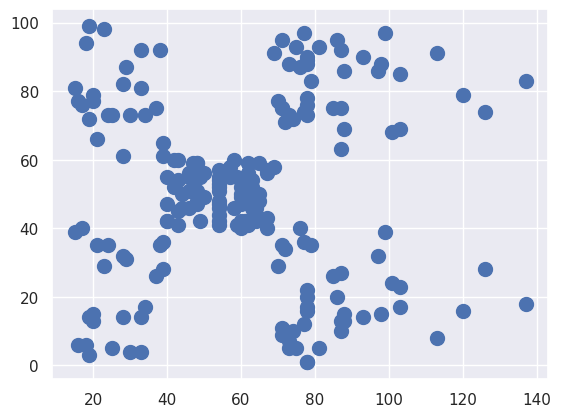

In [106]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

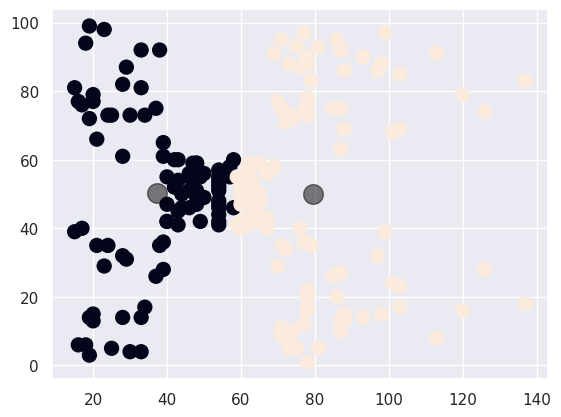

In [107]:
from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [108]:
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 181363.59595959607


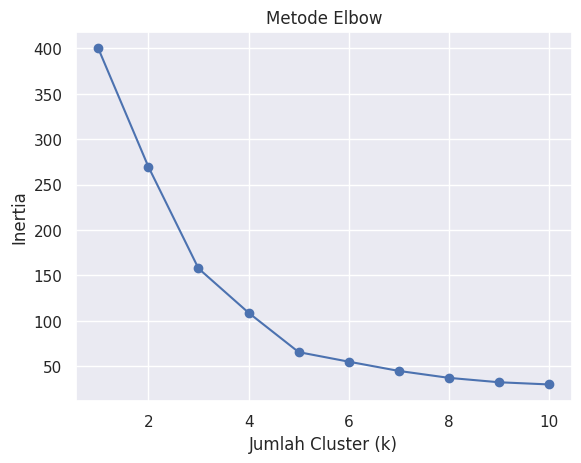

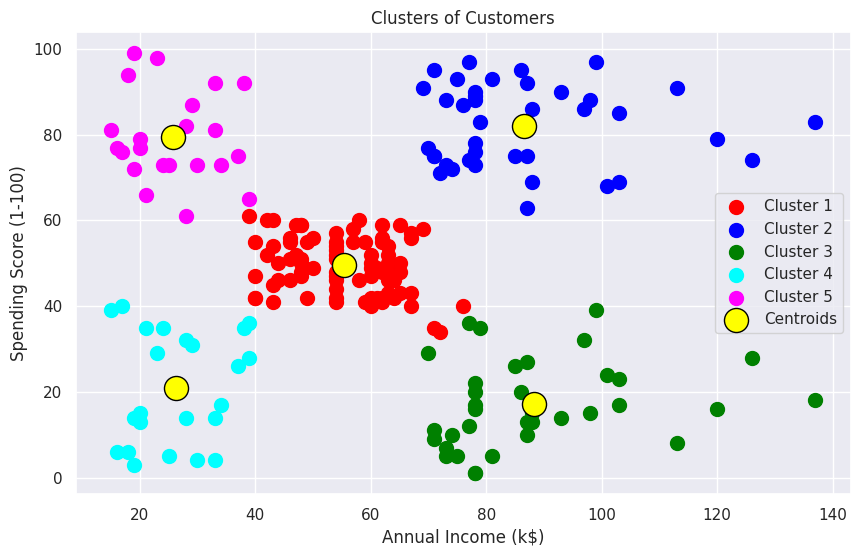

In [113]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow')
plt.show()

kmeans = KMeans(n_clusters=5, random_state=0, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']

for i, color in enumerate(colors):
    plt.scatter(X.iloc[y_kmeans == i, 0], X.iloc[y_kmeans == i, 1],
                s=100, c=color, label=f'Cluster {i+1}')

centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1],
            s=300, c='yellow', edgecolor='black', label='Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


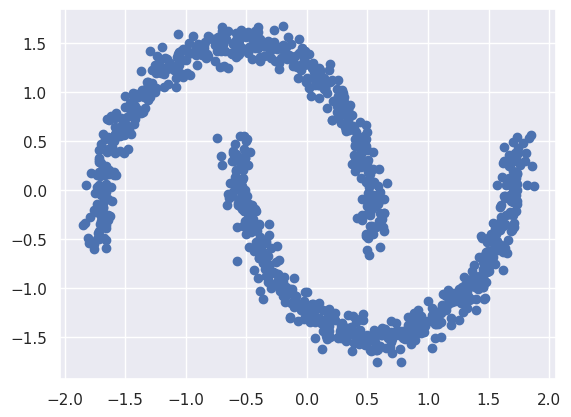

In [121]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

X, y_true = make_moons(n_samples=1000, noise=0.05, random_state=42)

X = StandardScaler().fit_transform(X)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [124]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = db.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

n_noise = list(labels).count(-1)

print("Jumlah cluster:", n_clusters)
print("Jumlah noise:", n_noise)

Jumlah cluster: 2
Jumlah noise: 0


In [126]:
from sklearn.metrics import (homogeneity_score, completeness_score, v_measure_score,
                             adjusted_rand_score, adjusted_mutual_info_score, silhouette_score)

# Ambil label hasil DBSCAN
labels = db.labels_

# Evaluasi (hanya jika cluster lebih dari 1)
if n_clusters > 1:
    hom = homogeneity_score(y_true, labels)
    com = completeness_score(y_true, labels)
    vme = v_measure_score(y_true, labels)
    ari = adjusted_rand_score(y_true, labels)
    ami = adjusted_mutual_info_score(y_true, labels)
    sil = silhouette_score(X, labels)

    print(f"Homogeneity : {hom:.3f}")
    print(f"Completeness: {com:.3f}")
    print(f"V-measure   : {vme:.3f}")
    print(f"ARI         : {ari:.3f}")
    print(f"AMI         : {ami:.3f}")
    print(f"Silhouette  : {sil:.3f}")
else:
    print("Cluster kurang dari 2, evaluasi tidak bisa dihitung.")

Homogeneity : 1.000
Completeness: 1.000
V-measure   : 1.000
ARI         : 1.000
AMI         : 1.000
Silhouette  : 0.391


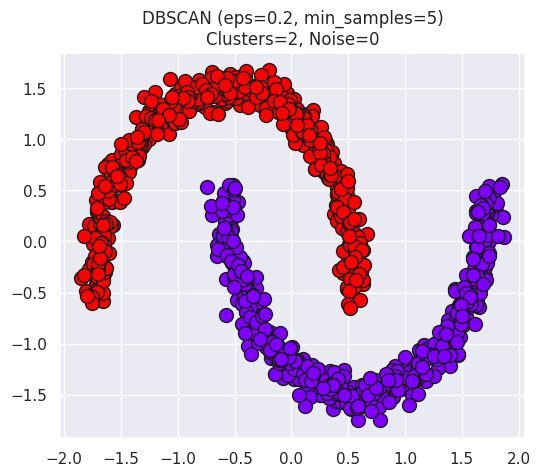

In [129]:
db = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = db.labels_

core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

unique_labels = set(labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(6, 5))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = "k"

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=10)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=4)

plt.title(f"DBSCAN (eps=0.2, min_samples=5)\nClusters={n_clusters}, Noise={n_noise}")
plt.show()


eps=0.05, min_samples=3 → Clusters=69, Noise=186
 Homogeneity : 0.8155542882355717
 Completeness: 0.15254831024758073
 V-measure   : 0.25702116445185835
 ARI         : 0.03004350976613907
 AMI         : 0.243804587789628
 Silhouette  : 0.11292949852882253



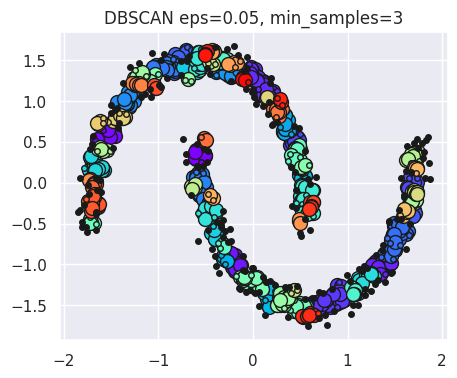

eps=0.05, min_samples=10 → Clusters=3, Noise=970
 Homogeneity : 0.030669398254336424
 Completeness: 0.126764095870306
 V-measure   : 0.04938947156339281
 ARI         : 0.0022825509789741014
 AMI         : 0.0458636142209481
 Silhouette  : -0.29419008256642176



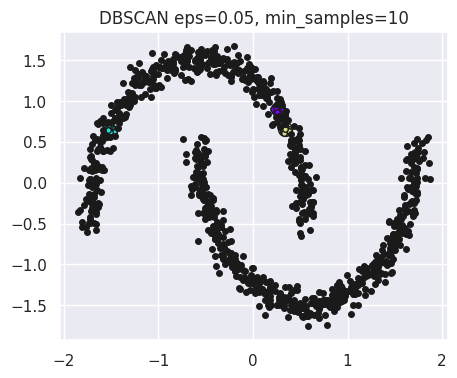

eps=0.05, min_samples=20 → Clusters=0, Noise=1000
Skipping metrics evaluation because 1 or fewer clusters were found.



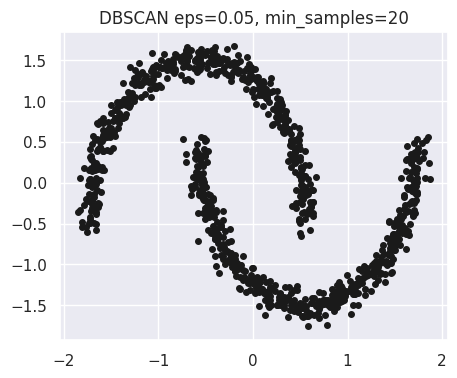

eps=0.1, min_samples=3 → Clusters=2, Noise=14
 Homogeneity : 0.9862068060955204
 Completeness: 0.9028959083596275
 V-measure   : 0.9427143195619004
 ARI         : 0.9721793882692121
 AMI         : 0.942633562340455
 Silhouette  : 0.2516903011504368



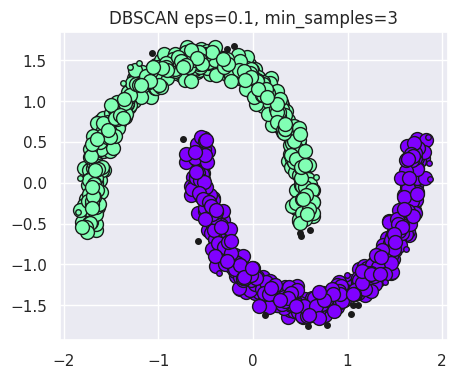

eps=0.1, min_samples=10 → Clusters=7, Noise=57
 Homogeneity : 0.9433167874862703
 Completeness: 0.4095463775841256
 V-measure   : 0.571132370522031
 ARI         : 0.5233989566001742
 AMI         : 0.5698012090719349
 Silhouette  : 0.16230611373347142



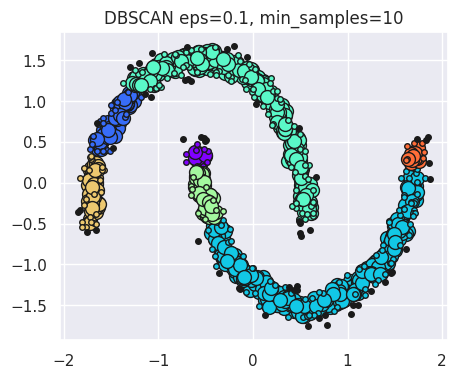

eps=0.1, min_samples=20 → Clusters=6, Noise=850
 Homogeneity : 0.1539283270028087
 Completeness: 0.15546586661916142
 V-measure   : 0.15469327639657426
 ARI         : 0.016753669189074054
 AMI         : 0.1509160954115189
 Silhouette  : -0.3601946191938665



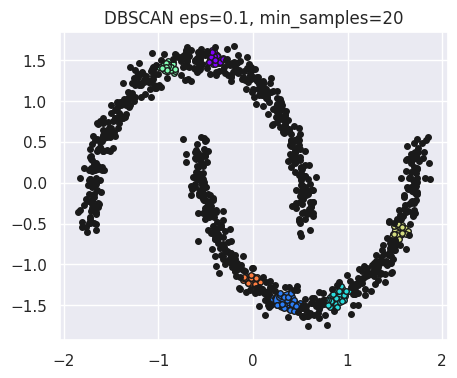

eps=0.3, min_samples=3 → Clusters=2, Noise=0
 Homogeneity : 1.0
 Completeness: 1.0
 V-measure   : 1.0
 ARI         : 1.0
 AMI         : 1.0
 Silhouette  : 0.3911598537138403



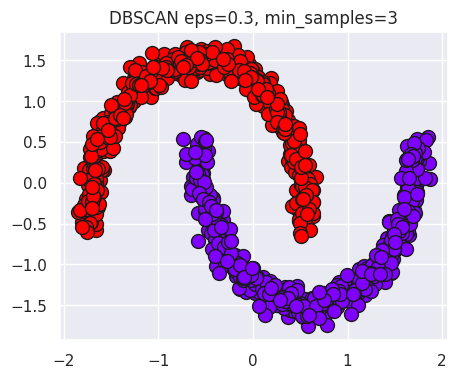

eps=0.3, min_samples=10 → Clusters=2, Noise=0
 Homogeneity : 1.0
 Completeness: 1.0
 V-measure   : 1.0
 ARI         : 1.0
 AMI         : 1.0
 Silhouette  : 0.3911598537138403



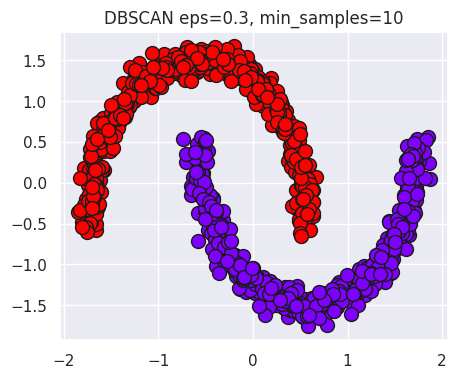

eps=0.3, min_samples=20 → Clusters=2, Noise=0
 Homogeneity : 1.0
 Completeness: 1.0
 V-measure   : 1.0
 ARI         : 1.0
 AMI         : 1.0
 Silhouette  : 0.3911598537138403



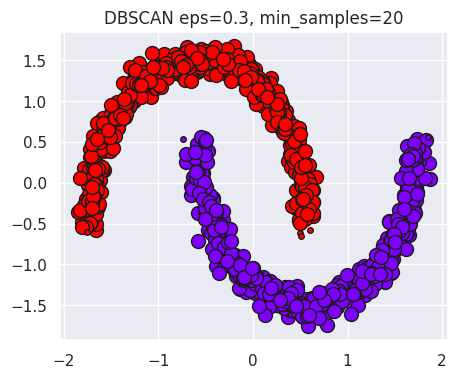

eps=0.5, min_samples=3 → Clusters=2, Noise=0
 Homogeneity : 1.0
 Completeness: 1.0
 V-measure   : 1.0
 ARI         : 1.0
 AMI         : 1.0
 Silhouette  : 0.3911598537138403



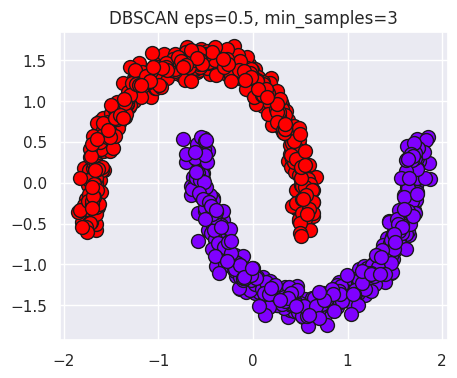

eps=0.5, min_samples=10 → Clusters=2, Noise=0
 Homogeneity : 1.0
 Completeness: 1.0
 V-measure   : 1.0
 ARI         : 1.0
 AMI         : 1.0
 Silhouette  : 0.3911598537138403



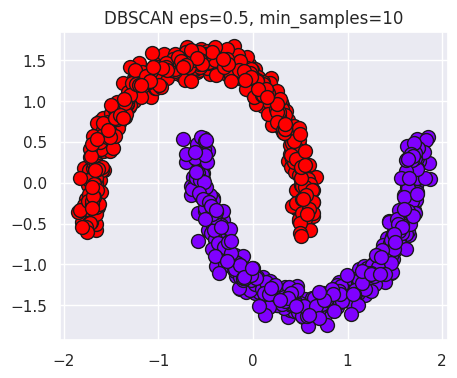

eps=0.5, min_samples=20 → Clusters=2, Noise=0
 Homogeneity : 1.0
 Completeness: 1.0
 V-measure   : 1.0
 ARI         : 1.0
 AMI         : 1.0
 Silhouette  : 0.3911598537138403



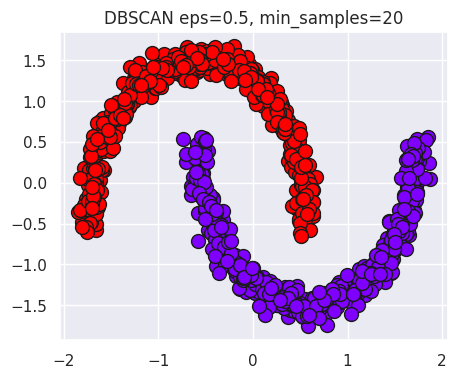

In [132]:
eps_exp = [0.05, 0.1, 0.3, 0.5]
min_samples_exp = [3, 10, 20]

for eps in eps_exp:
    for min_samples in min_samples_exp:
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        labels = db.labels_

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        print(f"eps={eps}, min_samples={min_samples} → Clusters={n_clusters}, Noise={n_noise}")

        if n_clusters > 1:
            print(" Homogeneity :", homogeneity_score(y_true, labels))
            print(" Completeness:", completeness_score(y_true, labels))
            print(" V-measure   :", v_measure_score(y_true, labels))
            print(" ARI         :", adjusted_rand_score(y_true, labels))
            print(" AMI         :", adjusted_mutual_info_score(y_true, labels))
            print(" Silhouette  :", silhouette_score(X, labels))
        else:
            print("Skipping metrics evaluation because 1 or fewer clusters were found.")
        print()

        core_samples_mask = np.zeros_like(labels, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        unique_labels = set(labels)
        colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

        plt.figure(figsize=(5, 4))
        for k, col in zip(unique_labels, colors):
            if k == -1:
                col = "k"

            class_member_mask = (labels == k)

            xy = X[class_member_mask & core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                     markeredgecolor='k', markersize=10)

            xy = X[class_member_mask & ~core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                     markeredgecolor='k', markersize=4)

        plt.title(f"DBSCAN eps={eps}, min_samples={min_samples}")
        plt.show()